In [ ]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from main import *


#reads files from directory
rp_9300_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Rockport\Rockport_1993-2002_pwl_harmwl_bwl.csv')
rp_9300_LH.drop(labels=range(876480,876486),axis = 0, inplace = True)
rp_0112_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Rockport\Rockport_2003-2012_pwl_harmwl_bwl.csv')
rp_0112_LH.drop(labels=range(876720,876726), axis = 0, inplace=True)
rp_1323_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Rockport\Rockport_2013-2023_pwl_harmwl_bwl.csv')
rp_1323_LH.drop(labels=range(len(rp_1323_LH)-6,len(rp_1323_LH)), axis=0, inplace=True)
directory_path = r'C:\Users\mrpro\Documents\Code\CBI\data 2\NOAA\rockport'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

#formats the dataframes
rp_NOAA = pd.concat(dataframes, ignore_index=True)
rp_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
rp_NOAA.reset_index(drop = True, inplace=True)
frames = [rp_9300_LH,rp_0112_LH,rp_1323_LH]
rp_LH = pd.concat(frames, ignore_index=True)
rp_LH.drop(labels=range(0,262800),axis=0, inplace=True)
rp_LH.reset_index(drop=True, inplace=True)

#renames the dataframes
comparison_df = pd.DataFrame()
comparison_df['Dates'] = rp_LH['#date+time']
comparison_df['Lighthouse WL'] = rp_LH['015-pwl']
comparison_df['NOAA WL'] = rp_NOAA[' Water Level']

#converts to numeric and date time values
comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()


#reading the new satelite data

RP_2007 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\07-08-nes-recreate-output-pt2\rockpo-2007001-output.csv')
#RP_2007 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/rock-port-2007-output.csv')
RP_2008 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\07-08-nes-recreate-output-pt2\rockpo-2008001-output.csv')
#RP_2008 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/rock-port-2008-output.csv')

#formating the dataset
RP_2007.reset_index(drop = True, inplace=True)
RP_2008.reset_index(drop = True, inplace=True)
RP_2007.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
RP_2007['Dates'] = pd.to_datetime(RP_2007['Date'])
RP_2007['Water Level'] = pd.to_numeric(RP_2007['Water Level'], errors='coerce')
RP_2008.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
RP_2008['Dates'] = pd.to_datetime(RP_2008['Date'])
RP_2008['Water Level'] = pd.to_numeric(RP_2008['Water Level'], errors='coerce')
RP = pd.concat([RP_2007,RP_2008],ignore_index=True)

#creates dataset with all values
total_df = RP.merge(comparison_df,on='Dates',how='outer')
total_df = total_df.drop(columns='Station #',axis=0)
total_df = total_df.drop(columns='Date',axis=0)
total_df['NES WL'] = total_df["Water Level"]


C:\Users\mrpro\AppData\Local\Temp\ipykernel_2196\3156908112.py:14: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  rp_9300_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Rockport\Rockport_1993-2002_pwl_harmwl_bwl.csv')
C:\Users\mrpro\AppData\Local\Temp\ipykernel_2196\3156908112.py:18: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  rp_1323_LH = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Rockport\Rockport_2013-2023_pwl_harmwl_bwl.csv')
C:\Users\mrpro\AppData\Local\Temp\ipykernel_2196\3156908112.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [3]:
total_df

,Water Level,Dates,Lighthouse WL,NOAA WL,NES WL
0,NaN,1996-01-01 00:00:00,1.957,1.957,NaN
1,NaN,1996-01-01 00:06:00,1.956,1.956,NaN
2,NaN,1996-01-01 00:12:00,1.955,1.955,NaN
3,NaN,1996-01-01 00:18:00,1.958,1.958,NaN
4,NaN,1996-01-01 00:24:00,1.961,1.961,NaN
...,...,...,...,...,...
2540750,NaN,2023-12-31 23:30:00,NaN,NaN,NaN
2540751,NaN,2023-12-31 23:36:00,NaN,NaN,NaN
2540752,NaN,2023-12-31 23:42:00,NaN,NaN,NaN
2540753,NaN,2023-12-31 23:48:00,NaN,NaN,NaN


Text(0.5, 1.0, 'Rockport Offset Correction 1')

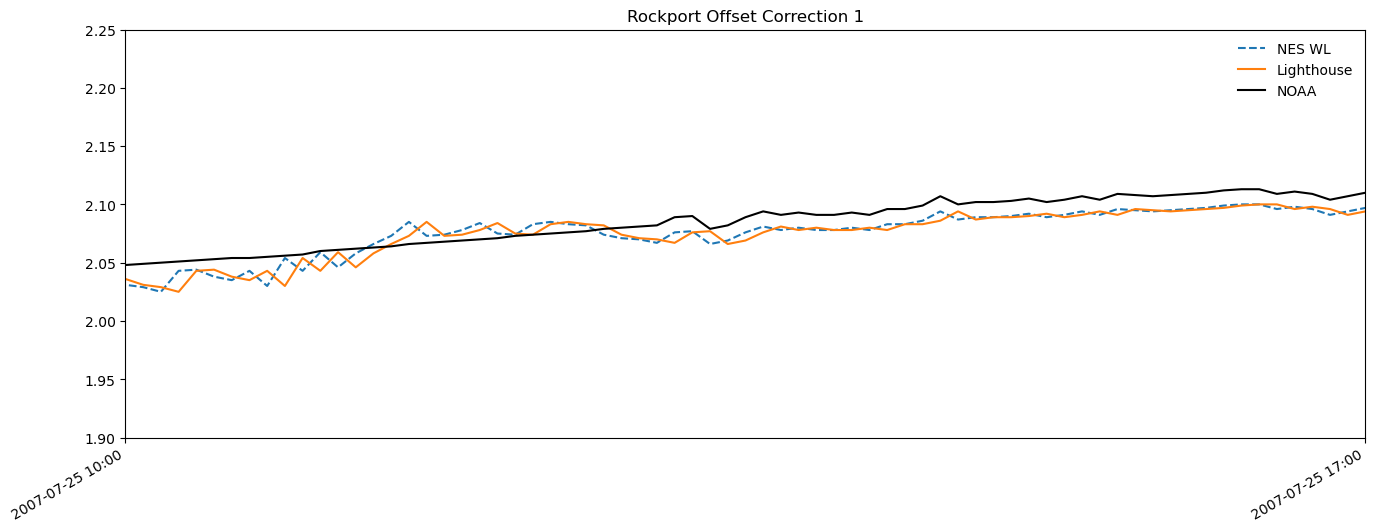

In [4]:
#### Plotting for verrificaion
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.9,2.25)

start_date = pd.to_datetime('2007-07-25 10:00')

end_date = pd.to_datetime('2007-07-25 17:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport Offset Correction 1')

Text(0.5, 1.0, 'Rockport Offset Correction 2')

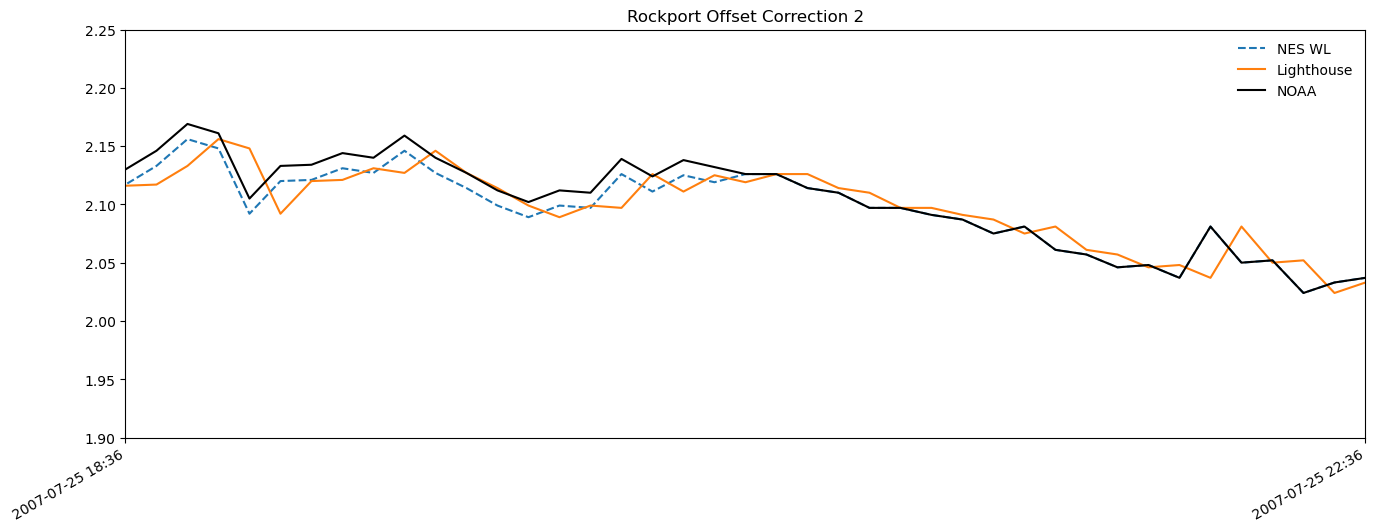

In [5]:
#### Plotting for verrificaion
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.9,2.25)

start_date = pd.to_datetime('2007-07-25 18:36')

end_date = pd.to_datetime('2007-07-25 22:36')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport Offset Correction 2')

Text(0.5, 1.0, 'Unknown Issue')

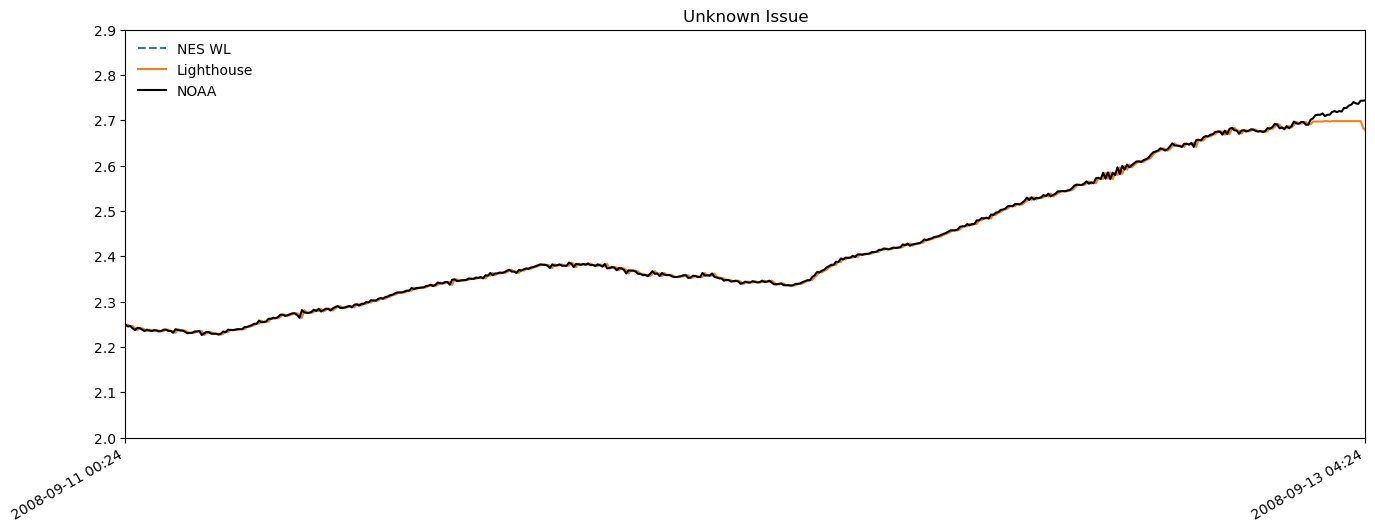

In [6]:
#### Plotting for verrificaion
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(2,2.9)

start_date = pd.to_datetime('2008-09-11 00:24')

end_date = pd.to_datetime('2008-09-13 04:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Unknown Issue')

Text(0.5, 1.0, 'Unknown Issue')

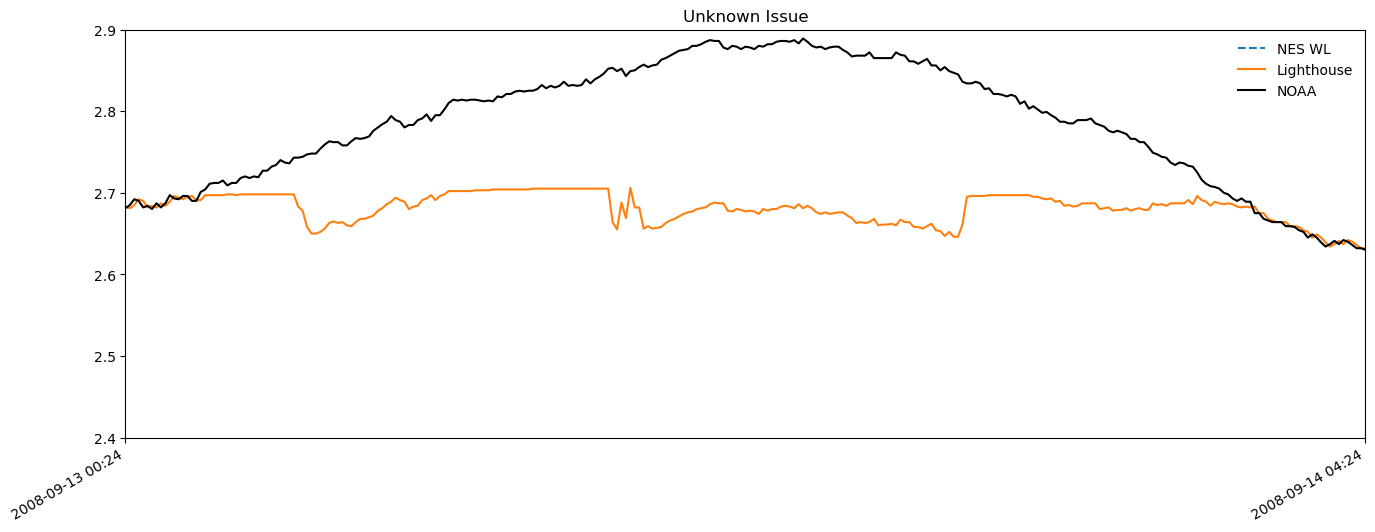

In [7]:
#### Plotting for verrificaion
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(2.4,2.9)

start_date = pd.to_datetime('2008-09-13 00:24')

end_date = pd.to_datetime('2008-09-14 04:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Unknown Issue')

Text(0.5, 1.0, 'Unknown Issue')

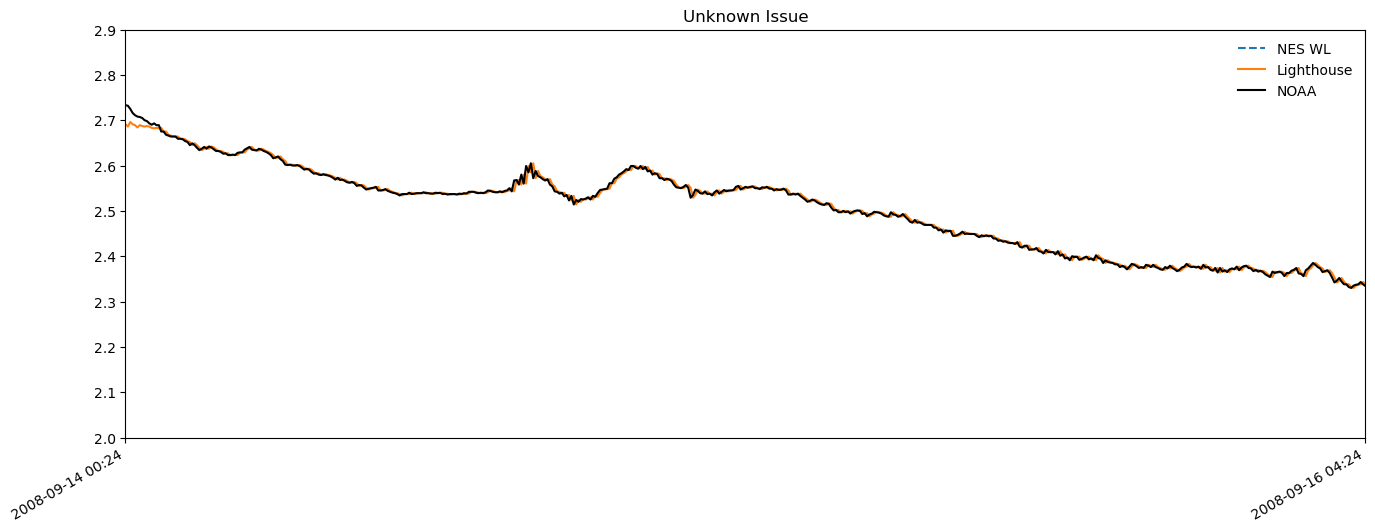

In [8]:
#### Plotting for verrificaion
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(2,2.9)

start_date = pd.to_datetime('2008-09-14 00:24')

end_date = pd.to_datetime('2008-09-16 04:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Unknown Issue')

Text(0.5, 1.0, 'Rock Port Unknown Issue')

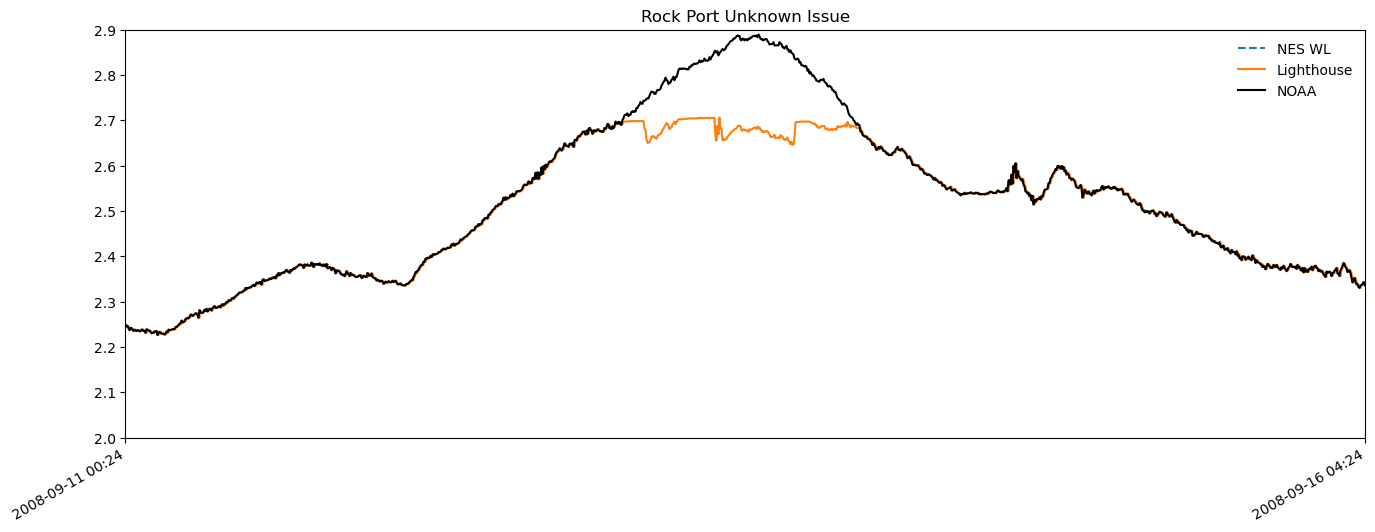

In [9]:
#### Plotting for verrificaion
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(2,2.9)

start_date = pd.to_datetime('2008-09-11 00:24')

end_date = pd.to_datetime('2008-09-16 04:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rock Port Unknown Issue')

Text(0.5, 1.0, 'Rockport Offset Correction 3')

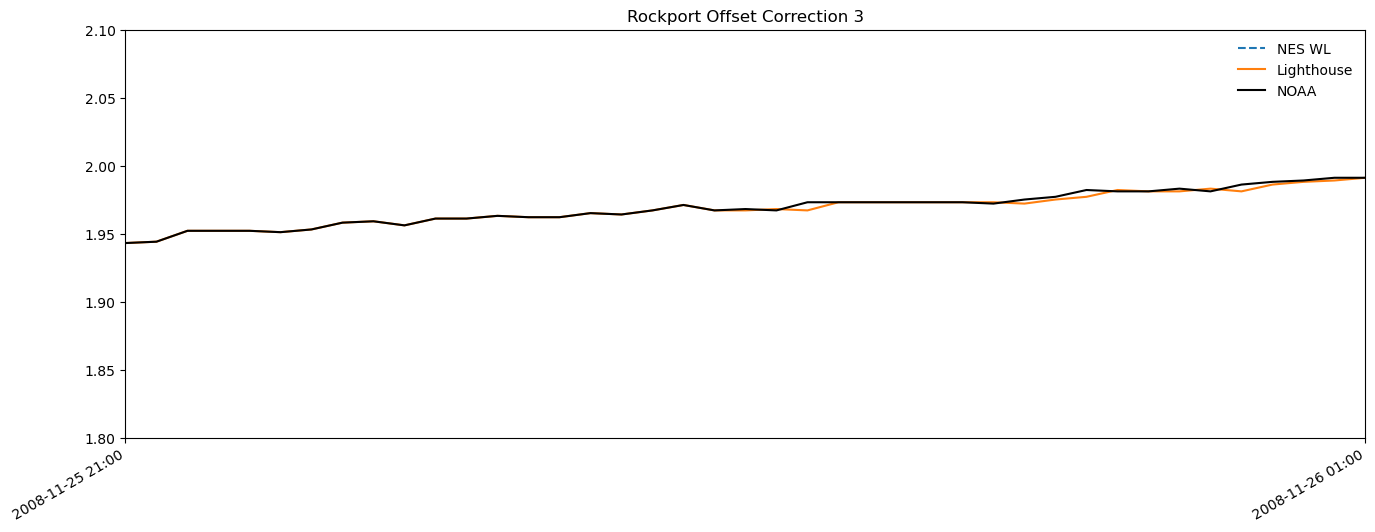

In [10]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.8,2.1)

start_date = pd.to_datetime('2008-11-25 21:00')

end_date = pd.to_datetime('2008-11-26 01:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport Offset Correction 3')

Text(0.5, 1.0, 'Rockport Offset Correction 6')

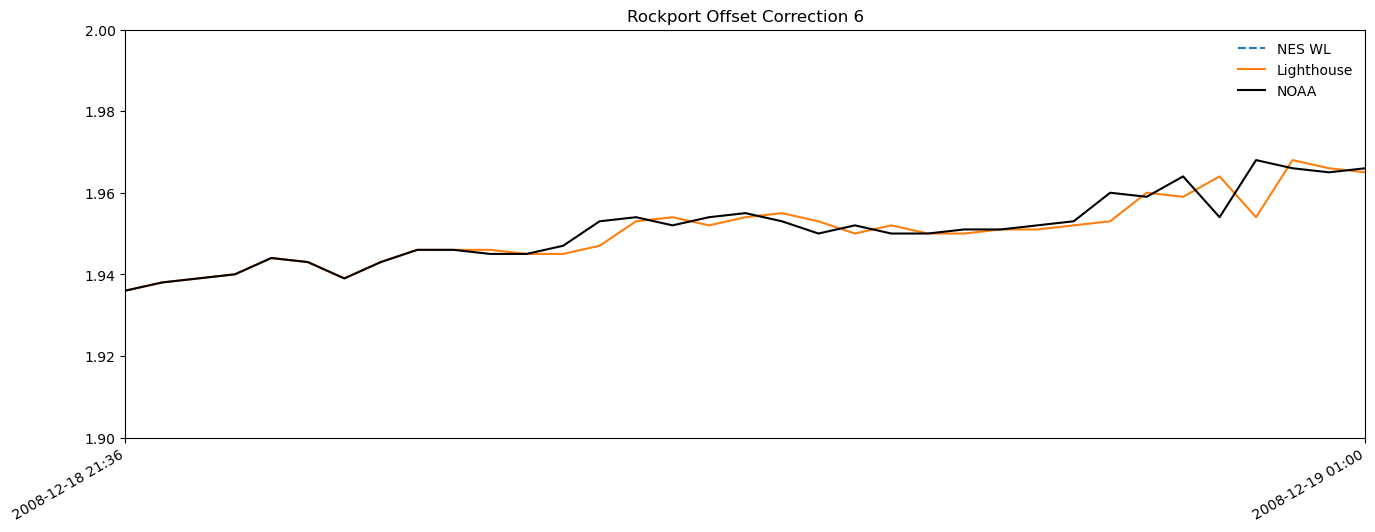

In [11]:
#### Plotting for verrificaion
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.9,2)

start_date = pd.to_datetime('2008-12-18 21:36')

end_date = pd.to_datetime('2008-12-19 01:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport Offset Correction 6')

In [12]:
disagreements(total_df)

0.45087213189920333

In [13]:
stats_df = difference_df(total_df)
non_zero_non_nan_rows = stats_df[stats_df['Difference'].notna() & (stats_df['Difference'] != 0)]

non_zero_non_nan_dates = total_df.loc[non_zero_non_nan_rows.index, 'Dates'].tolist()
non_zero_non_nan_values = non_zero_non_nan_rows['Difference'].tolist()

print(non_zero_non_nan_dates)
print(non_zero_non_nan_values)
len(non_zero_non_nan_rows)

[Timestamp('2007-01-04 00:12:00'), Timestamp('2007-01-04 00:12:00'), Timestamp('2007-01-04 00:24:00'), Timestamp('2007-01-04 00:24:00'), Timestamp('2007-01-04 00:36:00'), Timestamp('2007-01-04 00:36:00'), Timestamp('2007-01-04 01:12:00'), Timestamp('2007-01-04 01:12:00'), Timestamp('2007-01-04 01:24:00'), Timestamp('2007-01-04 01:24:00'), Timestamp('2007-01-04 01:36:00'), Timestamp('2007-01-04 01:36:00'), Timestamp('2007-01-04 02:06:00'), Timestamp('2007-01-04 02:06:00'), Timestamp('2007-01-04 04:06:00'), Timestamp('2007-01-04 04:06:00'), Timestamp('2007-01-04 04:12:00'), Timestamp('2007-01-04 04:12:00'), Timestamp('2007-01-04 04:18:00'), Timestamp('2007-01-04 04:18:00'), Timestamp('2007-01-04 04:48:00'), Timestamp('2007-01-04 04:48:00'), Timestamp('2007-01-04 05:00:00'), Timestamp('2007-01-04 05:00:00'), Timestamp('2007-01-17 04:00:00'), Timestamp('2007-01-17 04:00:00'), Timestamp('2007-01-17 04:06:00'), Timestamp('2007-01-17 04:06:00'), Timestamp('2007-01-17 04:12:00'), Timestamp('20

1180

Text(0.5, 1.0, 'Rockport Missing Data 1')

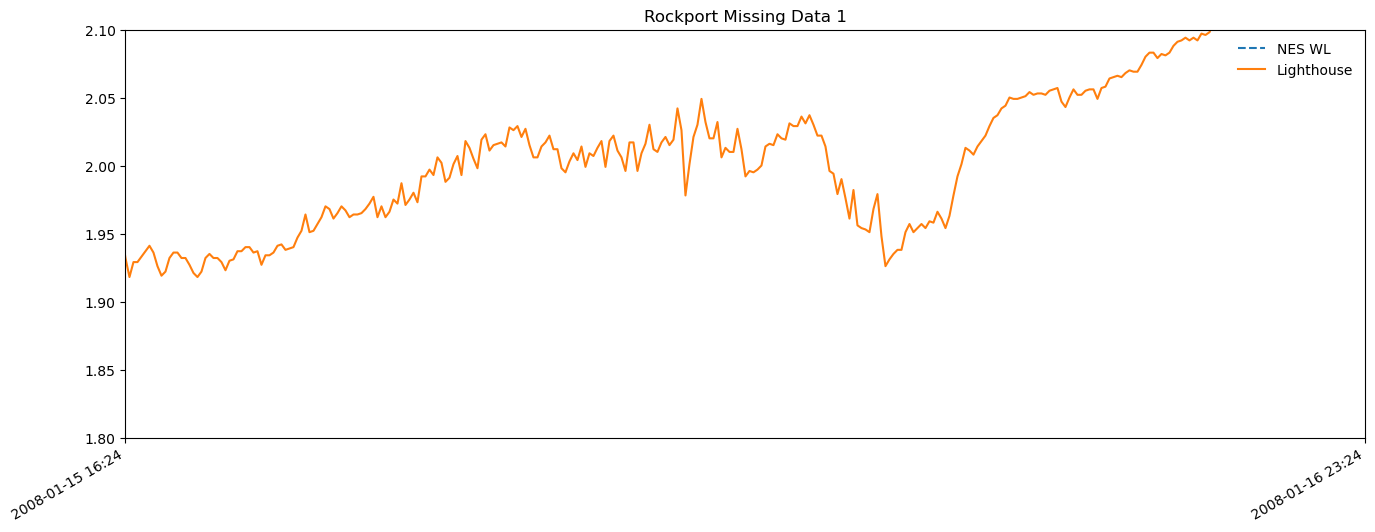

In [14]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.8,2.1)

start_date = pd.to_datetime('1/15/2008 16:24')

end_date = pd.to_datetime('1/16/2008 23:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport Missing Data 1')

In [15]:
date_index_locater('1/15/2008 16:24','1/15/2008 19:24', total_df)

[1141719,
 1141720,
 1141721,
 1141722,
 1141723,
 1141724,
 1141725,
 1141726,
 1141727,
 1141728,
 1141729,
 1141730,
 1141731,
 1141732,
 1141733,
 1141734,
 1141735,
 1141736,
 1141737,
 1141738,
 1141739,
 1141740,
 1141741,
 1141742,
 1141743,
 1141744,
 1141745,
 1141746,
 1141747,
 1141748,
 1141749]

In [16]:
total_df[1055654:1055680]

,Water Level,Dates,Lighthouse WL,NOAA WL,NES WL
1055654,2.158,2007-07-10 09:24:00,2.158,2.158,2.158
1055655,2.158,2007-07-10 09:24:00,2.158,2.158,2.158
1055656,2.158,2007-07-10 09:30:00,2.158,2.158,2.158
1055657,2.158,2007-07-10 09:30:00,2.158,2.158,2.158
1055658,2.157,2007-07-10 09:36:00,2.157,2.157,2.157
1055659,2.157,2007-07-10 09:36:00,2.157,2.157,2.157
1055660,2.161,2007-07-10 09:42:00,2.161,2.161,2.161
1055661,2.161,2007-07-10 09:42:00,2.161,2.161,2.161
1055662,2.165,2007-07-10 09:48:00,2.165,2.165,2.165
1055663,2.165,2007-07-10 09:48:00,2.165,2.165,2.165


Text(0.5, 1.0, 'Rockport Missing Data 2')

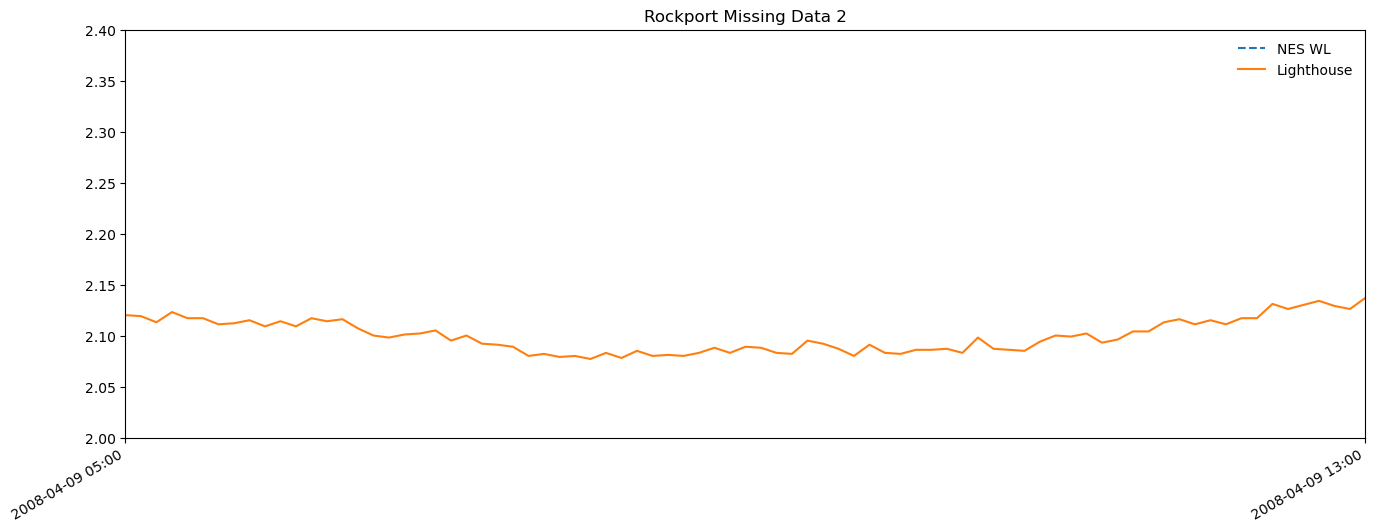

In [17]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(2,2.4)

start_date = pd.to_datetime('4/9/2008 05:00')

end_date = pd.to_datetime('4/9/2008 13:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport Missing Data 2')

Text(0.5, 1.0, 'Rockport Missing Data 3')

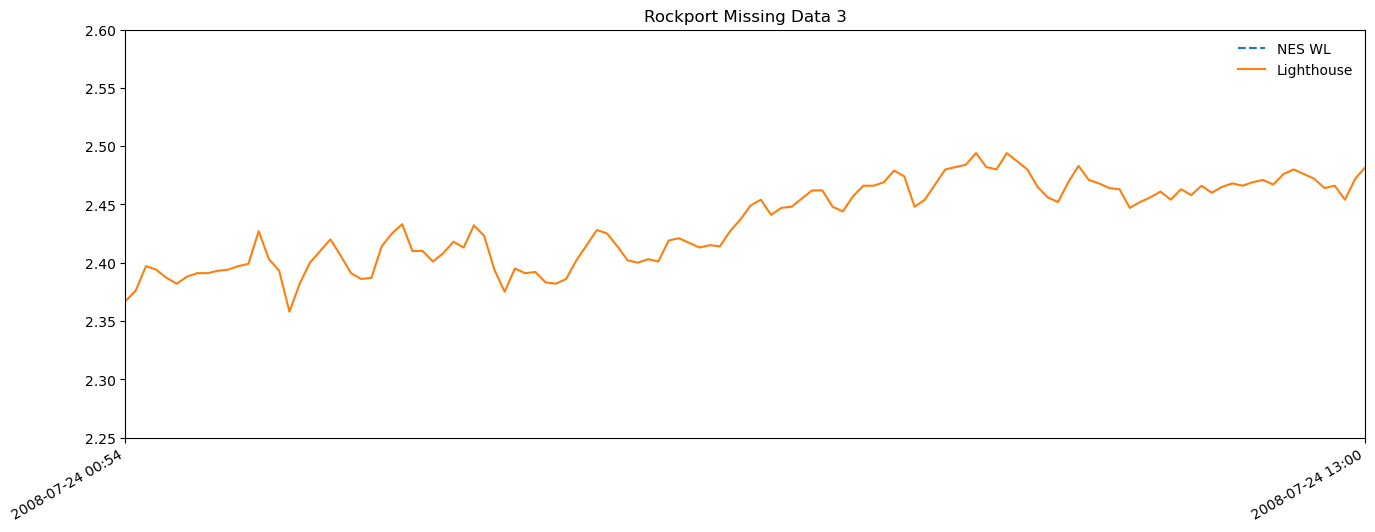

In [18]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(2.25,2.6)

start_date = pd.to_datetime('7/24/2008 00:54')

end_date = pd.to_datetime('7/24/2008 13:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport Missing Data 3')

In [19]:
date_index_locater('4/18/2007 14:54','4/18/2007 15:00',total_df)

[1015928, 1015929, 1015930, 1015931, 1015932, 1015933]

In [20]:
total_df[990149:990155]

,Water Level,Dates,Lighthouse WL,NOAA WL,NES WL
990149,1.894,2007-02-23 21:54:00,1.894,1.894,1.894
990150,1.902,2007-02-23 22:00:00,1.902,1.902,1.902
990151,1.902,2007-02-23 22:00:00,1.902,1.902,1.902
990152,1.900,2007-02-23 22:06:00,1.900,1.900,1.900
990153,1.900,2007-02-23 22:06:00,1.900,1.900,1.900
990154,1.901,2007-02-23 22:12:00,1.901,1.901,1.901


Text(0.5, 1.0, 'Rockport')

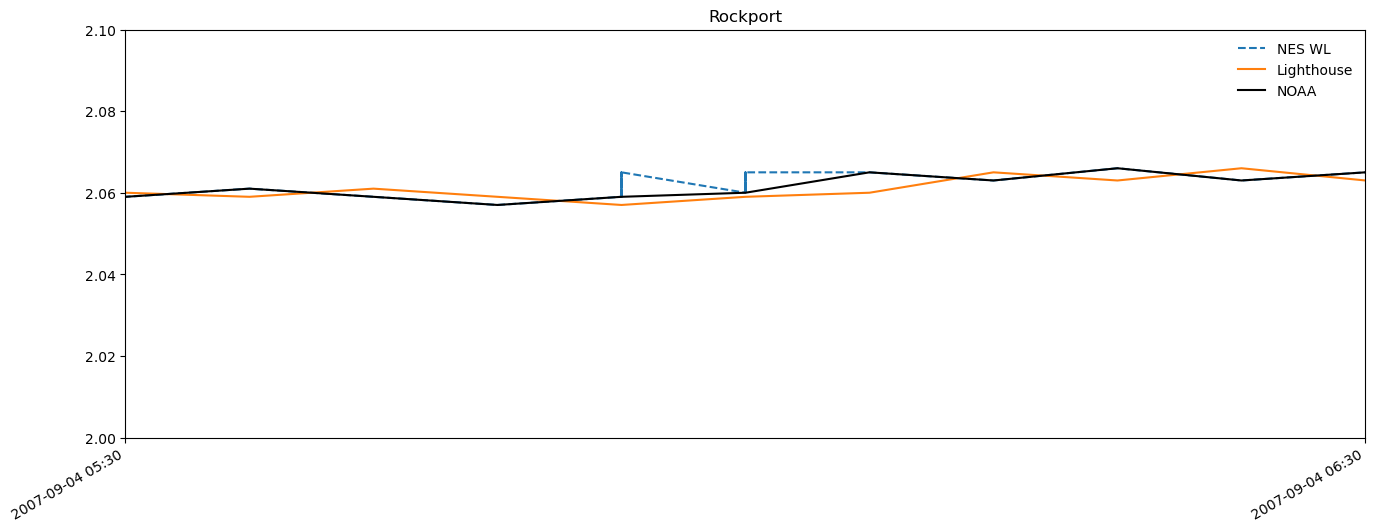

In [21]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(2,2.1)

start_date = pd.to_datetime('9/4/2007 5:30')

end_date = pd.to_datetime('9/4/2007 6:30')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport')